# Задание

1. Загрузите данные. Проверьте размеры, типы данных, пропуски и уникальные значения.
2. Постройте логарифмическое распределение Impressions для каждой кампании на Facebook.
3. Добавьте колонку CTR, изучите статистики и распределение.
4. Проанализируйте CTR по кампаниям.
5. Рассчитайте CPC, изучите его средние и вариации.
6. Постройте график CPC по полу.
7. Посчитайте конверсию из клика в покупку.

# Описание данных
    •	ad_id – идентификатор объявления (рекламы)
    •	xyz_campaign_id – идентификатор рекламной кампании в базе компании X
    •	fb_campaign_id – идентификатор кампании в Facebook
    •	age – возрастная группа, которой показывалась реклама
    •	gender – пол тех, кому показывалась реклама
    •	interest –код, указывающий категорию, к которой относится интерес пользователя: 
                (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
    •	impressions – число показов
    •	clicks – число кликов
    •	spent – сумма, которую компания потратила на показ объявления 
    •	total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
    •	approved_conversion – количество людей, которые купили продукт после просмотра рекламы


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

## 1. Загрузите данные. Проверьте размеры, типы данных, пропуски и уникальные значения.

In [3]:
ads = pd.read_csv('conversion.csv')

In [4]:
ads.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [5]:
# общая информация о датафрейме
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
# размер датафрейма
ads.shape

(1143, 11)

In [7]:
# количество пропущенных значений в каждом из столбцов датафрейма
ads.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [8]:
# количество уникальных значений в каждом из столбцов датафрейма
ads.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

## 2. Постройте логарифмическое распределение Impressions (число показов) для каждой кампании на Facebook.

In [9]:
# группируем данные по Impressions для каждой кампании на Facebook
ads_by_impressions_facebook = ads[['fb_campaign_id', 'Impressions']].groupby('fb_campaign_id', as_index=False).agg({'Impressions': 'sum'})

In [10]:
# Прологарифмируем столбец со значением Impressions
ads_by_impressions_facebook['Impressions'] = np.log(ads_by_impressions_facebook['Impressions'])

In [11]:
ads_by_impressions_facebook

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


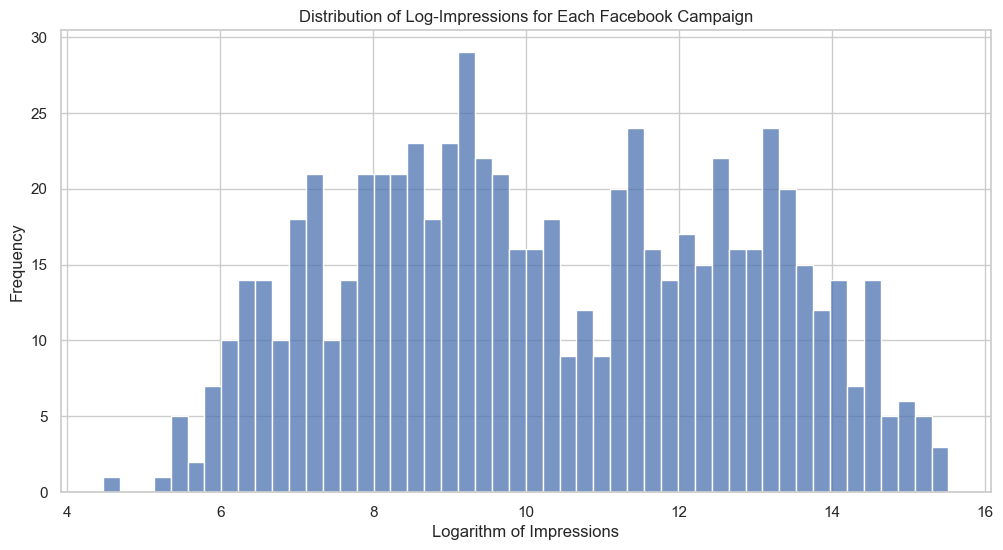

In [13]:
# Строим график распределения
sns.histplot(ads_by_impressions_facebook['Impressions'], bins=50, kde=False)
plt.xlabel('Logarithm of Impressions')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Impressions for Each Facebook Campaign')
plt.show()

## 3. Добавьте колонку CTR, изучите статистики и распределение.

In [14]:
ads['CTR'] = ads.Clicks / ads.Impressions

In [15]:
ads.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,0.000000
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.000192
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,0.000091
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,0.000316


In [16]:
ads.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [17]:
# строка датафрейма, где ctr наибольший
ads.loc[ads[['CTR']].idxmax()]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


## 4. Проанализируйте CTR по кампаниям.

<Axes: xlabel='CTR', ylabel='Count'>

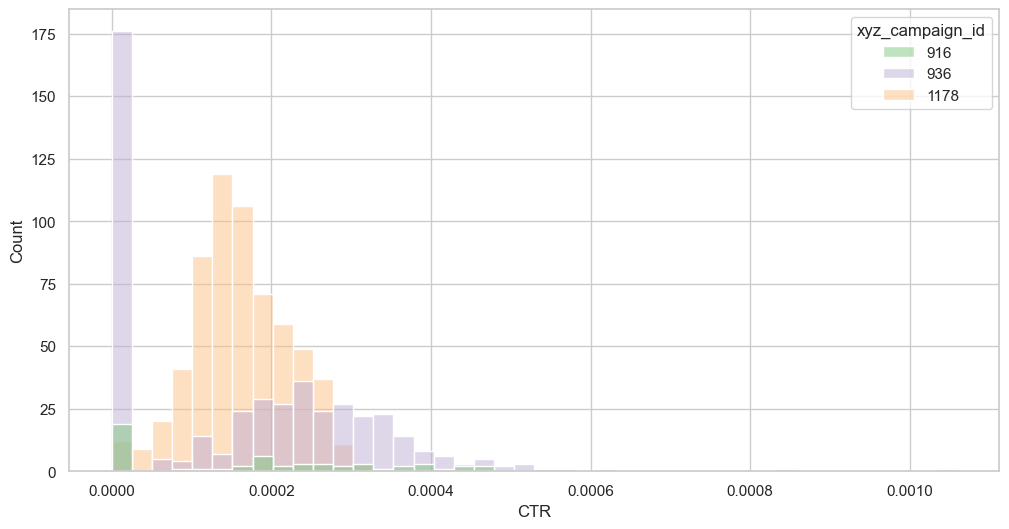

In [20]:
sns.histplot(data = ads, x="CTR", hue="xyz_campaign_id", palette="Accent")

## 5. Рассчитайте CPC, изучите его средние и вариации.

In [21]:
ads['CPC'] = ads.Spent / ads.Clicks

In [22]:
ads.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [23]:
ads.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

## 6. Постройте график CPC по полу.

<Axes: xlabel='CPC', ylabel='Count'>

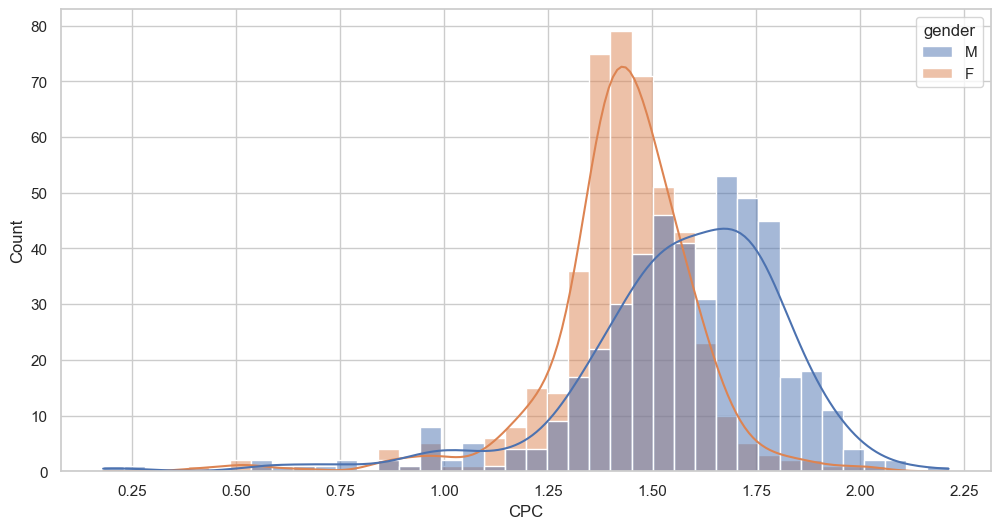

In [24]:
sns.histplot(data=ads, x="CPC", hue="gender", kde=True)

## 7. Посчитайте конверсию из клика в покупку.

In [25]:
ads['conversion_from_click_to_buy'] = ads.Approved_Conversion / ads.Clicks

In [26]:
ads

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion_from_click_to_buy
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,1.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.007937
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,0.014815
